In [120]:
import os
import pandas as pd

base_path = "output"
conditions = ["lld", "rld"]
groups = ["1_2", "3_4", "5_6", "7_8"]

dfs = {}

for cond in conditions:
    dfs[cond] = {}
    for group in groups:
        folder_path = os.path.join(base_path, cond, group)
        all_csvs = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

        dfs[cond][group] = {}
        for csv_file in all_csvs:
            path = os.path.join(folder_path, csv_file)
            key = os.path.splitext(csv_file)[0]

            # CSV laden mit dem "python"-Parser
            df = pd.read_csv(path, engine="python")

            # Zeilenumbrüche aus allen string-artigen Spalten entfernen
            for col in df.columns:
                if df[col].dtype == object:
                    df[col] = df[col].apply(
                        lambda x: str(x).replace("\n", " ") if pd.notnull(x) else x
                    )

            dfs[cond][group][key] = df


In [121]:
dfs["lld"]

{'1_2': {'person_1':      round  trial                                          timestamp  \
  0        1      1  ['14:14:14.373', '14:14:14.390', '14:14:14.409...   
  1        1      2  ['14:14:18.273', '14:14:18.289', '14:14:18.307...   
  2        1      3  ['14:14:21.623', '14:14:21.639', '14:14:21.657...   
  3        1      4  ['14:14:25.489', '14:14:25.507', '14:14:25.523...   
  4        1      5  ['14:14:30.040', '14:14:30.056', '14:14:30.073...   
  ..     ...    ...                                                ...   
  115      2     56  ['14:21:05.375', '14:21:05.389', '14:21:05.410...   
  116      2     57  ['14:21:08.561', '14:21:08.573', '14:21:08.590...   
  117      2     58  ['14:21:11.806', '14:21:11.823', '14:21:11.841...   
  118      2     59  ['14:21:14.840', '14:21:14.856', '14:21:14.874...   
  119      2     60  ['14:21:17.540', '14:21:17.558', '14:21:17.572...   
  
                                                 mouse_x  \
  0    [ 0.     0.     0.     

In [122]:
lld_df_1_2 = pd.concat(dfs["lld"]["1_2"].values(), ignore_index=True)
lld_df_3_4 = pd.concat(dfs["lld"]["3_4"].values(), ignore_index=True)
lld_df_5_6 = pd.concat(dfs["lld"]["5_6"].values(), ignore_index=True)
lld_df_7_8 = pd.concat(dfs["lld"]["7_8"].values(), ignore_index=True)

rld_df_1_2 = pd.concat(dfs["rld"]["1_2"].values(), ignore_index=True)
rld_df_3_4 = pd.concat(dfs["rld"]["3_4"].values(), ignore_index=True)
rld_df_5_6 = pd.concat(dfs["rld"]["5_6"].values(), ignore_index=True)
rld_df_7_8 = pd.concat(dfs["rld"]["7_8"].values(), ignore_index=True)



In [123]:
lld_delay_dfs = {}
lld_no_delay_dfs = {}
rld_delay_dfs = {}
rld_no_delay_dfs = {}

# Für lld: "l" = delay, "r" = no delay
for group in dfs["lld"]:
    df = pd.concat(dfs["lld"][group].values(), ignore_index=True)
    lld_delay_dfs[group] = df[df["targetPos"] == "l"].copy()
    lld_no_delay_dfs[group] = df[df["targetPos"] == "r"].copy()

# Für rld: "r" = delay, "l" = no delay
for group in dfs["rld"]:
    df = pd.concat(dfs["rld"][group].values(), ignore_index=True)
    rld_delay_dfs[group] = df[df["targetPos"] == "r"].copy()
    rld_no_delay_dfs[group] = df[df["targetPos"] == "l"].copy()


In [124]:
combined_delay_dfs = {}
combined_no_delay_dfs = {}

for group in ["1_2", "3_4", "5_6", "7_8"]:
    combined_delay_dfs[group] = pd.concat(
        [lld_delay_dfs[group], rld_delay_dfs[group]], ignore_index=True
    )
    
    combined_no_delay_dfs[group] = pd.concat(
        [lld_no_delay_dfs[group], rld_no_delay_dfs[group]], ignore_index=True
    )


In [115]:
combined_delay_dfs["1_2"]


,round,trial,timestamp,mouse_x,mouse_y,version,id,euk_dist,speed,targetPos
0,1,1,"['14:14:14.373', '14:14:14.390', '14:14:14.409...",[ 0. 0. 0. 0. 0. 0. 0....,[0. 0. 0. 0. 0. 0. 0. 0. ...,lld,1085,[0. 0. 0. 0. 0...,"[np.float64(0.0), np.float64(0.0), np.float64(...",l
1,1,3,"['14:14:21.623', '14:14:21.639', '14:14:21.657...",[ 0. 0. -0.011 -0.015 -0.016 -0.017 -0....,[ 0. 0. -0.012 -0.015 -0.017 -0.017 -0....,lld,1085,[0. 0. 0.01627882 0.005 0...,"[np.float64(0.021278820596099694), np.float64(...",l
2,1,4,"['14:14:25.489', '14:14:25.507', '14:14:25.523...",[ 0. 0.023 0.031 0.033 0.057 0.064 0....,[ 0. 0. 0. 0. 0. 0. -0....,lld,1085,[0.00000000e+00 2.30000000e-02 8.00000000e-03 ...,"[np.float64(0.031), np.float64(0.033), np.floa...",l
3,1,7,"['14:14:36.256', '14:14:36.274', '14:14:36.290...",[ 0. -0.056 -0.12 -0.209 -0.284 -0.354 -0....,[ 0. -0.025 -0.056 -0.089 -0.1 -0.126 -0....,lld,1085,[0. 0.06132699 0.07111259 0.09492102 0...,"[np.float64(0.13243957921609195), np.float64(0...",l
4,1,10,"['14:14:46.057', '14:14:46.073', '14:14:46.089...",[ 0. -0.136 -0.339 -0.531 -0.686 -0.817 -0....,[ 0. -0.049 -0.122 -0.18 -0.222 -0.259 -0....,lld,1085,[0. 0.14455795 0.21572668 0.20056919 0...,"[np.float64(0.5608538158403658), np.float64(0....",l
...,...,...,...,...,...,...,...,...,...,...
3103,2,54,"['08:42:15.321', '08:42:15.337', '08:42:15.354...",[ 0. 0. 0. 0. 0. 0. 0....,[ 0. 0. 0. 0. 0. 0. 0....,rld,4295,[0. 0. 0. 0. 0...,"[np.float64(0.0), np.float64(0.0), np.float64(...",r
3104,2,56,"['08:42:20.417', '08:42:20.434', '08:42:20.451...",[ 0. -0.004 -0.006 -0.029 -0.059 -0.069 -0....,[ 0. -0.004 -0.005 -0.006 -0.006 -0.006 -0....,rld,4295,[0. 0.00565685 0.00223607 0.02302173 0...,"[np.float64(0.007892922226992163), np.float64(...",r
3105,2,57,"['08:42:23.282', '08:42:23.299', '08:42:23.316...",[ 0. -0.018 -0.035 -0.041 -0.066 -0.085 -0....,[ 0. 0. 0. 0. 0. 0. 0....,rld,4295,[0. 0.018 0.017 0.006 0...,"[np.float64(0.034999999999999976), np.float64(...",r
3106,2,59,"['08:42:28.262', '08:42:28.279', '08:42:28.296...",[ 0.000e+00 0.000e+00 0.000e+00 0.000e+00 -...,[ 0. -0.001 -0.001 -0.001 -0.001 -0.001 -0....,rld,4295,[0. 0.001 0. 0. 0...,"[np.float64(0.000999999999999994), np.float64(...",r


In [125]:
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_speed_for_intervals(df, interval_ms=20):
    """
    Berechnet die Geschwindigkeit für gegebene Zeitintervalle (z.B. 20ms)
    
    Parameters:
    df: DataFrame mit Spalten 'timestamp' (Listen), 'euk_dist' (Listen)
    interval_ms: Zeitintervall in Millisekunden (Standard: 20ms)
    
    Returns:
    DataFrame mit berechneten Geschwindigkeiten
    """
    
    # Kopie des DataFrames erstellen
    result_df = df.copy()
    
    # Neue Spalte für berechnete Geschwindigkeiten
    calculated_speeds = []
    
    # Für jede Zeile (jeden Trial) die Geschwindigkeit berechnen
    for idx, row in df.iterrows():
        # Timestamps und euklidische Distanzen extrahieren
        timestamps = row['timestamp']
        euk_distances = row['euk_dist']
        
        # Falls timestamps als String gespeichert sind, zu Liste konvertieren
        if isinstance(timestamps, str):
            timestamps = eval(timestamps)
        if isinstance(euk_distances, str):
            # Für numpy array strings verwenden wir numpy.fromstring
            euk_distances = np.fromstring(euk_distances.strip('[]'), sep=' ')
        
        # Zu numpy arrays konvertieren
        timestamps = np.array(timestamps)
        euk_distances = np.array(euk_distances)
        
        # Timestamps zu datetime konvertieren
        timestamp_dt = pd.to_datetime(timestamps, format='%H:%M:%S.%f')
        
        # Zeit in Millisekunden seit Start berechnen
        start_time = timestamp_dt[0]
        time_ms = (timestamp_dt - start_time).total_seconds() * 1000
        
        # Zeitintervalle definieren (20ms Abschnitte)
        max_time = time_ms.max()
        intervals = np.arange(0, max_time + interval_ms, interval_ms)
        
        # Speed-Liste für diesen Trial initialisieren
        speeds = []
        
        for i in range(len(time_ms)):
            if i == 0:
                # Erster Punkt: Geschwindigkeit = 0
                speeds.append(0)
            else:
                # Euklidische Distanz zwischen aufeinanderfolgenden Punkten
                distance = euk_distances[i]
                
                # Zeitdifferenz in Sekunden
                time_diff = (time_ms[i] - time_ms[i-1]) / 1000
                
                # Geschwindigkeit = Distanz / Zeit
                if time_diff > 0:
                    speed = distance / time_diff
                else:
                    speed = 0
                
                speeds.append(speed)
        
        calculated_speeds.append(speeds)
    
    result_df['calculated_speed'] = calculated_speeds
    return result_df

In [134]:
combined_delay_dfs["1_2"] = calculate_speed_for_intervals(combined_delay_dfs["1_2"])
combined_delay_dfs["3_4"] = calculate_speed_for_intervals(combined_delay_dfs["3_4"])
combined_delay_dfs["5_6"] = calculate_speed_for_intervals(combined_delay_dfs["5_6"])
combined_delay_dfs["7_8"] = calculate_speed_for_intervals(combined_delay_dfs["7_8"])

combined_no_delay_dfs["1_2"] = calculate_speed_for_intervals(combined_delay_dfs["1_2"])
combined_no_delay_dfs["3_4"] = calculate_speed_for_intervals(combined_delay_dfs["3_4"])
combined_no_delay_dfs["5_6"] = calculate_speed_for_intervals(combined_delay_dfs["5_6"])
combined_no_delay_dfs["7_8"] = calculate_speed_for_intervals(combined_delay_dfs["7_8"])

570


In [34]:
def get_speed_length(x):
    if isinstance(x, str):
        speed_list = eval(x)
    else:
        speed_list = x
    return len(speed_list)

In [69]:
speed_lengths = combined_delay_dfs["1_2"]["speed"].apply(get_speed_length)
count_70_to_80 = speed_lengths[(speed_lengths >= 0) & (speed_lengths <= 81)].count()

In [70]:
print(f"Anzahl der Speed-Arrays mit 70 bis 80 Datenpunkten: {count_70_to_80}")

Anzahl der Speed-Arrays mit 70 bis 80 Datenpunkten: 3108


ValueError: x and y must have same first dimension, but have shapes (201,) and (215951,)

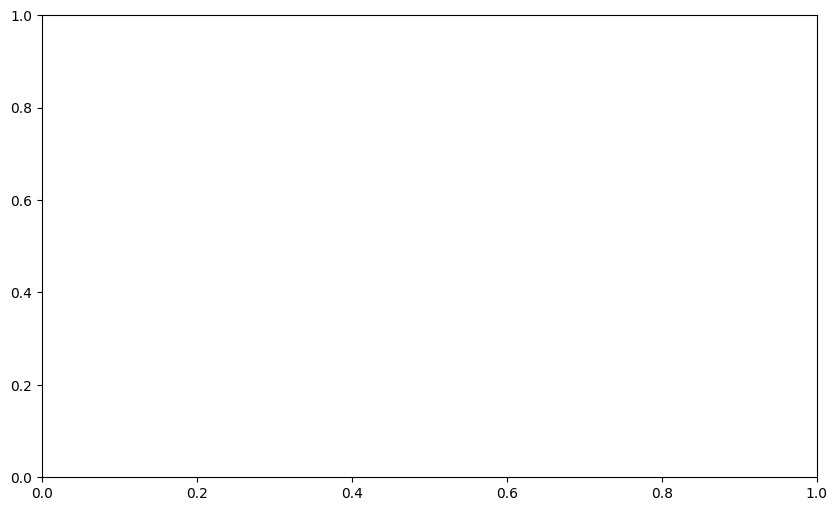

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hole Delay- und No-Delay-Daten für Gruppe 1_2
delay_df = combined_delay_dfs["1_2"]
no_delay_df = combined_no_delay_dfs["1_2"]

# Funktion zum Extrahieren und Normalisieren der Speed-Werte
def extract_speed_matrix(df):
    speed_lists = df["calculated_speed"].apply(lambda x: eval(x) if isinstance(x, str) else x)
    max_len = 4000/20  # 4000 ms / 50 ms

    matrix = []
    for s in speed_lists:
        s = np.array(s, dtype=np.float64)  # sicherstellen, dass es ein Array ist
        if len(s) >= max_len:
            trimmed = s[:max_len]
        else:
            trimmed = np.pad(s, (0, max_len - len(s)), constant_values=np.nan)
        matrix.append(trimmed)
    return np.array(matrix)


# Speed-Matrizen erstellen
delay_speed = delay_df["calculated_speed"]
no_delay_speed = no_delay_df["calculated_speed"]

# Mittelwert und Standardfehler berechnen
delay_mean = np.nanmean(delay_speed, axis=0)
# delay_sem = np.nanstd(delay_speed, axis=0) / np.sqrt(np.sum(~np.isnan(delay_speed), axis=0))

no_delay_mean = np.nanmean(no_delay_speed, axis=0)
# no_delay_sem = np.nanstd(no_delay_speed, axis=0) / np.sqrt(np.sum(~np.isnan(no_delay_speed), axis=0))

# Zeitachse in ms
time = np.arange(0, 4000 + 1, 20)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, delay_mean, label="Delay", color="blue")
# plt.fill_between(time, delay_mean - delay_sem, delay_mean + delay_sem, alpha=0.3, color="blue")

plt.plot(time, no_delay_mean, label="No Delay", color="orange")
# plt.fill_between(time, no_delay_mean - no_delay_sem, no_delay_mean + no_delay_sem, alpha=0.3, color="orange")

plt.xlabel("Zeit (ms)")
plt.ylabel("Speed")
plt.title("Speed-Verlauf – Gruppe 1_2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


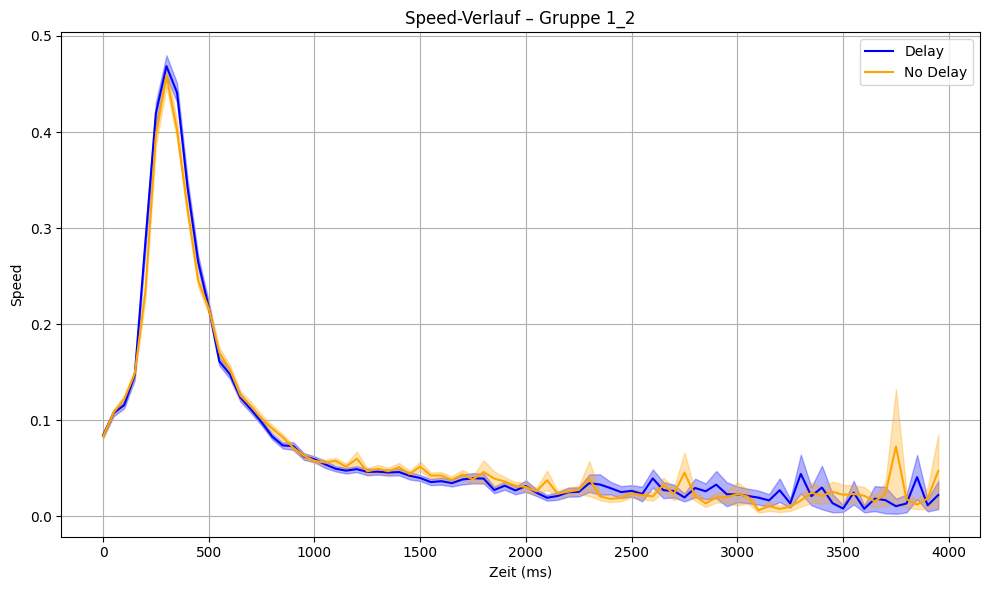

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hole Delay- und No-Delay-Daten für Gruppe 1_2
delay_df = combined_delay_dfs["3_4"]
no_delay_df = combined_no_delay_dfs["3_4"]

# Funktion zum Extrahieren und Normalisieren der Speed-Werte
def extract_speed_matrix(df):
    speed_lists = df["speed"].apply(lambda x: eval(x) if isinstance(x, str) else x)
    max_len = 80  # 4000 ms / 50 ms

    matrix = []
    for s in speed_lists:
        s = np.array(s, dtype=np.float64)  # sicherstellen, dass es ein Array ist
        if len(s) >= max_len:
            trimmed = s[:max_len]
        else:
            trimmed = np.pad(s, (0, max_len - len(s)), constant_values=np.nan)
        matrix.append(trimmed)
    return np.array(matrix)


# Speed-Matrizen erstellen
delay_speed = extract_speed_matrix(delay_df)
no_delay_speed = extract_speed_matrix(no_delay_df)

# Mittelwert und Standardfehler berechnen
delay_mean = np.nanmean(delay_speed, axis=0)
delay_sem = np.nanstd(delay_speed, axis=0) / np.sqrt(np.sum(~np.isnan(delay_speed), axis=0))

no_delay_mean = np.nanmean(no_delay_speed, axis=0)
no_delay_sem = np.nanstd(no_delay_speed, axis=0) / np.sqrt(np.sum(~np.isnan(no_delay_speed), axis=0))

# Zeitachse in ms
time = np.arange(0, 4000, 50)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, delay_mean, label="Delay", color="blue")
plt.fill_between(time, delay_mean - delay_sem, delay_mean + delay_sem, alpha=0.3, color="blue")

plt.plot(time, no_delay_mean, label="No Delay", color="orange")
plt.fill_between(time, no_delay_mean - no_delay_sem, no_delay_mean + no_delay_sem, alpha=0.3, color="orange")

plt.xlabel("Zeit (ms)")
plt.ylabel("Speed")
plt.title("Speed-Verlauf – Gruppe 1_2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


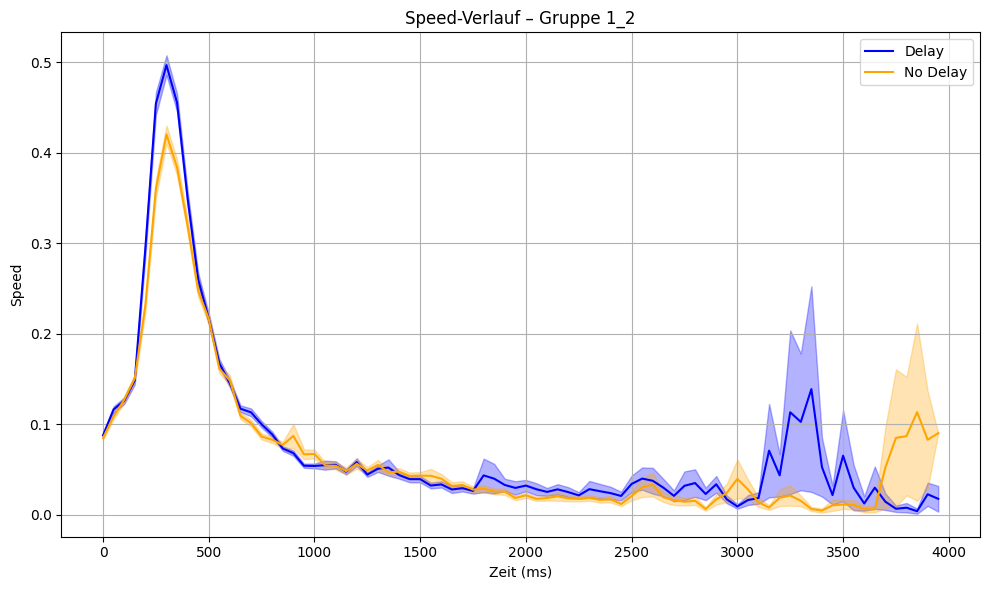

In [ ]:
delay_df = combined_delay_dfs["5_6"]
no_delay_df = combined_no_delay_dfs["5_6"]

# Speed-Matrizen erstellen
delay_speed = extract_speed_matrix(delay_df)
no_delay_speed = extract_speed_matrix(no_delay_df)

# Mittelwert und Standardfehler berechnen
delay_mean = np.nanmean(delay_speed, axis=0)
delay_sem = np.nanstd(delay_speed, axis=0) / np.sqrt(np.sum(~np.isnan(delay_speed), axis=0))

no_delay_mean = np.nanmean(no_delay_speed, axis=0)
no_delay_sem = np.nanstd(no_delay_speed, axis=0) / np.sqrt(np.sum(~np.isnan(no_delay_speed), axis=0))

# Zeitachse in ms
time = np.arange(0, 4000, 50)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, delay_mean, label="Delay", color="blue")
plt.fill_between(time, delay_mean - delay_sem, delay_mean + delay_sem, alpha=0.3, color="blue")

plt.plot(time, no_delay_mean, label="No Delay", color="orange")
plt.fill_between(time, no_delay_mean - no_delay_sem, no_delay_mean + no_delay_sem, alpha=0.3, color="orange")

plt.xlabel("Zeit (ms)")
plt.ylabel("Speed")
plt.title("Speed-Verlauf – Gruppe 1_2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


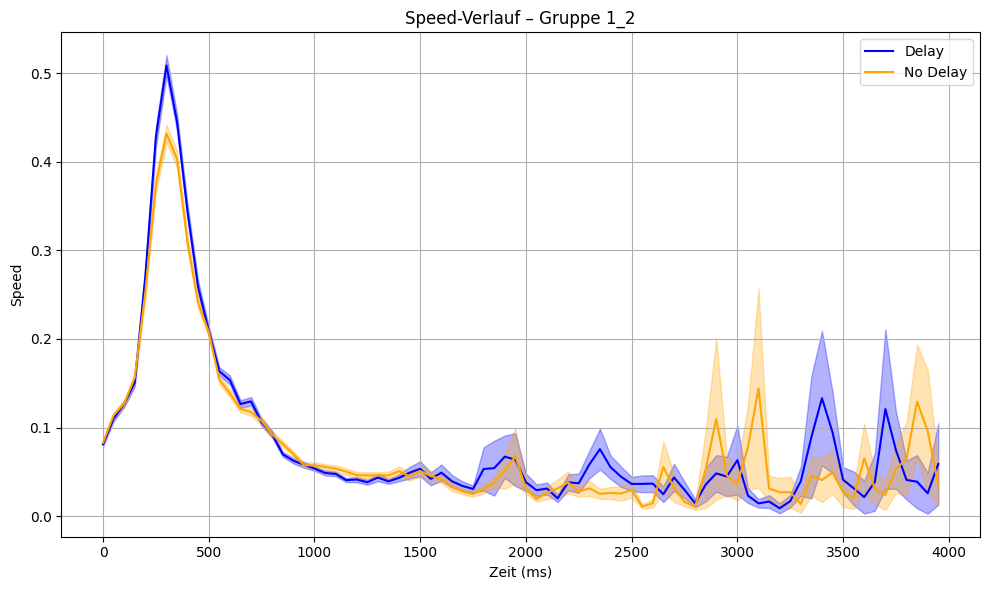

In [ ]:
delay_df = combined_delay_dfs["7_8"]
no_delay_df = combined_no_delay_dfs["7_8"]

# Speed-Matrizen erstellen
delay_speed = extract_speed_matrix(delay_df)
no_delay_speed = extract_speed_matrix(no_delay_df)

# Mittelwert und Standardfehler berechnen
delay_mean = np.nanmean(delay_speed, axis=0)
delay_sem = np.nanstd(delay_speed, axis=0) / np.sqrt(np.sum(~np.isnan(delay_speed), axis=0))

no_delay_mean = np.nanmean(no_delay_speed, axis=0)
no_delay_sem = np.nanstd(no_delay_speed, axis=0) / np.sqrt(np.sum(~np.isnan(no_delay_speed), axis=0))

# Zeitachse in ms
time = np.arange(0, 4000, 50)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, delay_mean, label="Delay", color="blue")
plt.fill_between(time, delay_mean - delay_sem, delay_mean + delay_sem, alpha=0.3, color="blue")

plt.plot(time, no_delay_mean, label="No Delay", color="orange")
plt.fill_between(time, no_delay_mean - no_delay_sem, no_delay_mean + no_delay_sem, alpha=0.3, color="orange")

plt.xlabel("Zeit (ms)")
plt.ylabel("Speed")
plt.title("Speed-Verlauf – Gruppe 1_2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
lld_df = pd.concat([
    df for group in dfs["lld"].values() for df in group.values()
], ignore_index=True)

rld_df = pd.concat([
    df for group in dfs["rld"].values() for df in group.values()
], ignore_index=True)


In [37]:
import re
import numpy as np

def parse_speed_string(s):
    # Findet alle Zahlen (inkl. Dezimalpunkte, evtl. auch Exponentialschreibweise)
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", s)
    return np.array([float(num) for num in numbers])


In [38]:
import numpy as np
from scipy.interpolate import interp1d
import ast

def interpolate_single_speed(arr, n_points=100):
    import numpy as np

    if isinstance(arr, str):
        arr = parse_speed_string(arr)  # nutze die obige Funktion
    
    arr = np.array(arr)
    if len(arr) < 2:
        return np.nan
    
    x_original = np.linspace(0, 1, len(arr))
    x_interp = np.linspace(0, 1, n_points)
    f = interp1d(x_original, arr, kind='linear')
    return f(x_interp)



In [39]:
for df in [lld_df_1_2, lld_df_3_4, lld_df_5_6, lld_df_7_8]:
    df["interpolated_speed"] = df["speed"].apply(lambda x: interpolate_single_speed(x, n_points=100))


In [41]:
lld_df_1_2

,round,trial,timestamp,mouse_x,mouse_y,version,id,euk_dist,speed,targetPos,interpolated_speed
0,1,1,"['14:14:14.373', '14:14:14.390', '14:14:14.409...",[ 0. 0. 0. 0. 0. 0. 0....,[0. 0. 0. 0. 0. 0. 0. 0. ...,lld,1085,[0. 0. 0. 0. 0...,"[np.float64(0.0), np.float64(0.0), np.float64(...",l,"[64.0, 34.90909090909091, 5.818181818181813, 2..."
1,1,2,"['14:14:18.273', '14:14:18.289', '14:14:18.307...",[0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0....,lld,1085,[0. 0. 0. 0. 0...,"[np.float64(0.0), np.float64(0.0), np.float64(...",r,"[64.0, 31.030303030303024, 1.9393939393939459,..."
2,1,3,"['14:14:21.623', '14:14:21.639', '14:14:21.657...",[ 0. 0. -0.011 -0.015 -0.016 -0.017 -0....,[ 0. 0. -0.012 -0.015 -0.017 -0.017 -0....,lld,1085,[0. 0. 0.01627882 0.005 0...,"[np.float64(0.021278820596099694), np.float64(...",l,"[64.0, 28.456266011442274, 7.130025618307654, ..."
3,1,4,"['14:14:25.489', '14:14:25.507', '14:14:25.523...",[ 0. 0.023 0.031 0.033 0.057 0.064 0....,[ 0. 0. 0. 0. 0. 0. -0....,lld,1085,[0.00000000e+00 2.30000000e-02 8.00000000e-03 ...,"[np.float64(0.031), np.float64(0.033), np.floa...",l,"[64.0, 10.369424242424238, 43.323151515151515,..."
4,1,5,"['14:14:30.040', '14:14:30.056', '14:14:30.073...",[0. 0. 0. 0.011 0.015 0.016 0.017 0.0...,[ 0. 0. 0. 0. 0. 0. 0....,lld,1085,[0. 0. 0. 0.011 0...,"[np.float64(0.010999999999999996), np.float64(...",r,"[64.0, 38.79221212121212, 13.584424242424241, ..."
...,...,...,...,...,...,...,...,...,...,...,...
2995,2,56,"['13:26:25.876', '13:26:25.891', '13:26:25.926...",[ 0. 0. 0. 0. -0.023 -0.03 -0....,[ 0. 0. 0. 0. -0.022 -0.03 -0....,lld,3610,[0. 0. 0. 0. 0...,"[np.float64(0.0), np.float64(0.0), np.float64(...",r,"[64.0, 25.858585858585855, 12.282828282828289,..."
2996,2,57,"['13:26:29.608', '13:26:29.641', '13:26:29.657...",[ 0. 0. 0. 0. 0. 0. 0....,[ 0. 0. 0. 0. 0. 0. 0....,lld,3610,[0. 0. 0. 0. 0...,"[np.float64(0.0), np.float64(0.0), np.float64(...",r,"[64.0, 16.808080808080803, 30.383838383838395,..."
2997,2,58,"['13:26:33.525', '13:26:33.558', '13:26:33.591...",[0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0. 0. 0. 0. 0. 0. 0....,lld,3610,[0. 0. 0. 0. 0...,"[np.float64(0.0), np.float64(0.0), np.float64(...",r,"[64.0, 18.101010101010097, 27.797979797979803,..."
2998,2,59,"['13:26:37.664', '13:26:37.691', '13:26:37.727...",[ 0. 0. 0. 0. 0. 0. 0....,[ 0. 0. 0. 0. 0. 0. 0....,lld,3610,[0. 0. 0. 0. 0...,"[np.float64(0.0), np.float64(0.0), np.float64(...",l,"[64.0, 19.39393939393939, 25.212121212121218, ..."


c:\Users\m_uel\Desktop\Masterarbeit\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


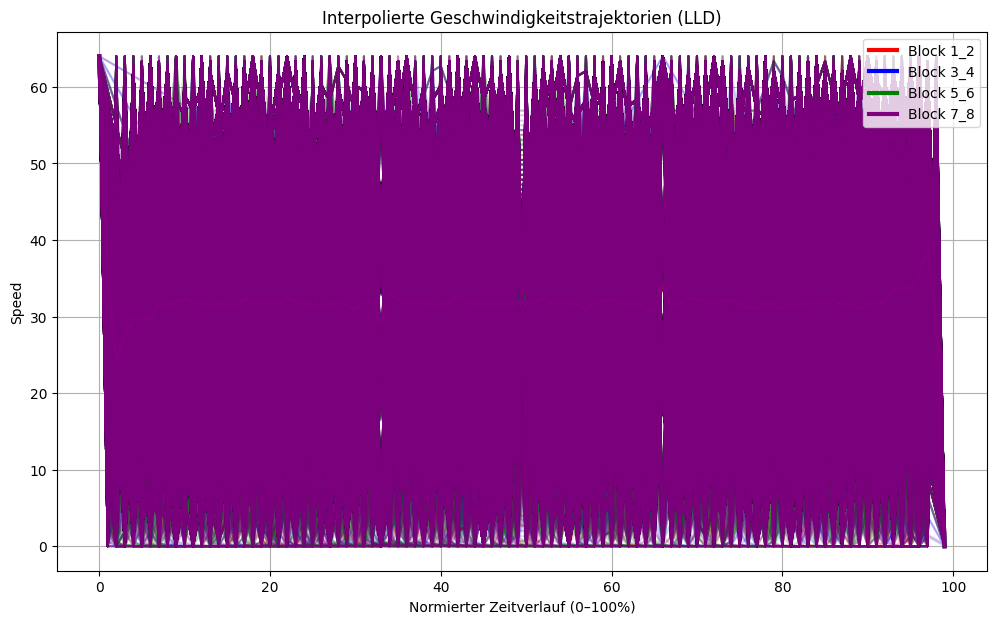

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Angenommen, du hast diese DataFrames schon mit der Spalte 'interpolated_speed':
blocks = {
    "1_2": lld_df_1_2,
    "3_4": lld_df_3_4,
    "5_6": lld_df_5_6,
    "7_8": lld_df_7_8
}

colors = ["red", "blue", "green", "purple"]

plt.figure(figsize=(12, 7))

for i, (block_name, df) in enumerate(blocks.items()):
    speeds = df["interpolated_speed"].dropna().values
    speeds = np.array([s for s in speeds if isinstance(s, np.ndarray)])  # nur Arrays behalten

    # Einzelne Trials zeichnen
    for speed in speeds:
        plt.plot(speed, color=colors[i], alpha=0.2)

    # Mittelwert-Kurve
    mean_speed = np.mean(speeds, axis=0)
    plt.plot(mean_speed, color=colors[i], linewidth=3, label=f"Block {block_name}")

plt.title("Interpolierte Geschwindigkeitstrajektorien (LLD)")
plt.xlabel("Normierter Zeitverlauf (0–100%)")
plt.ylabel("Speed")
plt.grid(True)
plt.legend()
plt.show()
